In [ ]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str


In [3]:
def start_play(state:State):
    print("start play node")
    return {"graph_info":state["graph_info"]+"i am planning to play"}

def Cricket(state:State):
    print("cricket play node")
    return {"graph_info":state["graph_info"]+"i am decided to play cricket"}    


def Badminton(state:State):
    print("badminton play node")
    return {"graph_info":state["graph_info"]+"i am decided to play badminton"}        

In [4]:
import random
from typing import Literal

def random_play(state:State)->Literal['Cricket','Badminton']:
    if random.random()>0.5:
        return 'Cricket'
    else:
        return'Badminton'

In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

graph=StateGraph(State)
graph.add_node("start_play",start_play)
graph.add_node("Cricket",Cricket)
graph.add_node("Badminton",Badminton)

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)

graph.add_edge("Cricket",END)
graph.add_edge("Badminton",END)
graph_builder=graph.compile()




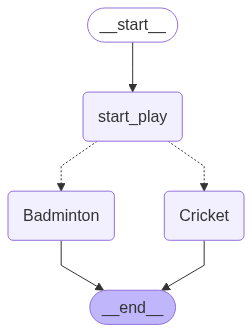

In [6]:
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [7]:
graph_builder.invoke({"graph_info":"my name is mithlesh"})

start play node
badminton play node


{'graph_info': 'my name is mithleshi am planning to playi am decided to play badminton'}

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


TypeError: 'function' object is not iterable